# Violet Ballard - Shopify Data Science Intern Challenge - Fall 2022

## **Question 1**
### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

#### **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

The first step I took in understanding the calculation of average order value was to download the dataset and examine it in Excel. It appeared as though there were some outliers for order_amount that would indicate an inflated the AOV. I then described order_amount pandas and plotted a boxplot to look at the shape of the data.

In [2]:
# Descriptive statistics for order_amount
import pandas as pd

dtypes = {
    'order_id': 'category',
    'shop_id': 'category',
    'user_id': 'category',
    'order_amount': 'int',
    'total_items': 'int',
    'payment_method': 'category',
    'created_at': 'str'
}

parse_dates = ['created_at']

intern_challenge_df = pd.read_csv("shopify-intern-challenge-dataset.csv", dtype=dtypes, parse_dates=parse_dates)
print(intern_challenge_df['order_amount'].describe())


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


The median value (50% percentile) provides a much more reasonable number than the mean. Looking at the high standard deviation, the reasonable 25%-75% percentiles, and the high max values, it is clear that there are a few outliers that make the value of AOV is inflated when calculated as a mean. This becomes really clear when viewing order_amount as a boxplot. The quartiles disappear on the chart because the outliers are so far outside the standard distribution.

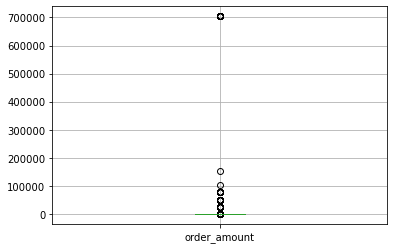

In [3]:
# Boxplot for order_amount
boxplot = intern_challenge_df.boxplot(column=['order_amount'])

#### **What metric would you report for this dataset?**

I would want to look at the median value for order_amount in addition to the mean value for order_amount in order to provide an interpretable metric for AOV. Seeing a high mean with a lower median for a month would mean that a few stores sold really well that month but that it is not a permanent pattern. If the median starts to increase and converge with the mean, this means that there is an overall growth in average order value. I would return both the median and mean values as a named tuple, so they can be viewed as a pair.

#### **What is its value?**

In [4]:
#Calculate Average Order Value (AOV)
from collections import namedtuple

median_order_value = intern_challenge_df['order_amount'].median()
mean_order_value = intern_challenge_df['order_amount'].mean()

AOV = namedtuple('AOV', 'median mean')
aov = AOV(median_order_value, mean_order_value)

print(f"median order value: {aov.median}")
print(f"mean order value: {aov.mean}")

median order value: 284.0
mean order value: 3145.128
